### Статистические зависимости

1. Используя дискретный ряд распределения, полученный в лабораторной работе № 1, вычислить коэффициент линейной корреляции
между возрастом преступника и частотой совершаемых преступлений.
2. При уровне значимости α = 0,05 проверить нулевую гипотезу о значимости выборочного коэффициента корреляции.
3. Построить корреляционное поле.
4. Исследовать совокупность данных на наличие нелинейной корреляционной зависимости. Для этого вычислить корреляционное отношение, взяв за основу группировку из предыдущего проекта

### Теоретическая модель
Корреляционным моментом (ковариацией) 𝜇𝑥𝑦 случайных величин X и У называют математическое ожидание произведения их отклонений:

$$\mu_{xy} = cov(X,Y) = 𝑀([𝑋 − 𝑀(𝑋)][𝑌 − 𝑀(𝑌)]) = 𝑀(𝑋𝑌) − 𝑀(𝑋)𝑀(𝑌)$$

Коэффициентом корреляции 𝜌𝑥𝑦 случайных величин X и У называют отношение корреляционного момента к произведению средних квадратических отклонений этих величин:

$$\rho_{xy} = \frac{\mu_{xy}}{\sigma(X)\sigma(Y)} = \frac{𝑀(𝑋𝑌) − 𝑀(𝑋)𝑀(𝑌)}{\sigma(X)\sigma(Y)}$$

In [61]:
from collections import Counter
import math
f = open("moscow_2021.txt", "r")
data = []
for num in f:
    num = num.strip()
    if num:
        data.append(int(num))
data.sort()
sorted_data = data
print(sorted_data)
data_counter = Counter(data)
print(sorted(data_counter.items()))

n = len(data_counter)

avg_x = sum(data_counter.keys()) / n
avg_y = sum(data_counter.values()) / len(data_counter)

cov_xy = sum((num - avg_x) * (freq - avg_y) for num, freq in data_counter.items()) / n

dev_x = math.sqrt(sum((num - avg_x) ** 2 for num in data_counter) / n)
dev_y = math.sqrt(sum((freq - avg_y) ** 2 for freq in data_counter.values()) / len(data_counter))

rho = cov_xy / (dev_x * dev_y)
print("rho:", rho)




[14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,

Полученый коэффициент $\rho = -0.58$, говорит о том, что корреляция между возрастом и колличеством преступлений присутствует и она обратно-зависимая

### Проверка статистической гипотезы о значимости выборочного коэффициента корреляции при уровне значимости $\alpha = 0.5$

Нулевая гипотеза
$$H_0: \rho_{xy} = 0$$
Конкурирующая гипотеза
$$H_1: \rho_{xy} \neq 0$$

Если нулевая гипотеза отвергается, то выборочный коэффициент корреляции значимо отличается от нуля (или значим), а X и Y коррелированы, то есть связаны линейной зависимостью.

Критерий проверки нулевй гипотезы 
$$T = \frac{r_{xy}\sqrt{n-2}}{\sqrt{1-{r_{xy}}^2}}$$

Где $k= n-2$


$$r_{xy} = \frac{ \overline{xy} - \overline{x} * \overline{y} }{\sigma_{x}^{*} * \sigma_{y}^{*} }$$

$\overline{x}$,$\overline{y}$ – средние величин X и Y,$\sigma_{x}^{*}$ , $\sigma_{y}^{*}$ – средние квадратические отклонения величин 𝑋 и 𝑌, вычисленные по результатам наблюдений, $\overline{xy}$ – средняя
произведения значений величин X и Y

Критическая область двусторонняя 

In [59]:
import scipy 
import math

def average(data):
    average_sum = 0
    for num in data:
        average_sum += num
    average_num = average_sum/len(data)
    return average_num

def variance(data):
    variance_sum = 0
    average_of_data = average(data)
    for num in data:
        
        variance_sum += ((num - average_of_data)**2)
    return ((variance_sum)/len(data))

def sqrt_of_average(data):
    return math.sqrt(variance(data))
print(sqrt_of_average(data))

sko_x = sqrt_of_average(data_counter.keys())
sko_y = sqrt_of_average(data_counter.values())

r_xy = (cov_xy) / (sko_x * sko_y)
print("r_xy:", r_xy)


T = (rho * math.sqrt(n - 2)) / math.sqrt(1 - rho*rho)
print("T_набл:", T)

k = len(data_counter) - 2 
print("k:", k)
alpha = 0.05

t_crit = scipy.stats.t.ppf(1 - alpha/2, k-1)
print( "t_кр = " + f"{t_crit}")

if abs(T) < t_crit:
    print("Нет оснований отвергнуть нулевую гипотезу")
else:
    print("Гипотеза отвергается")


12.038146371631143
r_xy: -0.5776885005968904
T_набл: -5.2961545796629315
k: 56
t_кр = 2.004044783289146
Гипотеза отвергается


выборочный коэффициент корреляции 𝑟𝑥𝑦 значимо
отличается от нуля. Это означает, что величины X и Y коррелированы.

# 3. Корреляционное поле



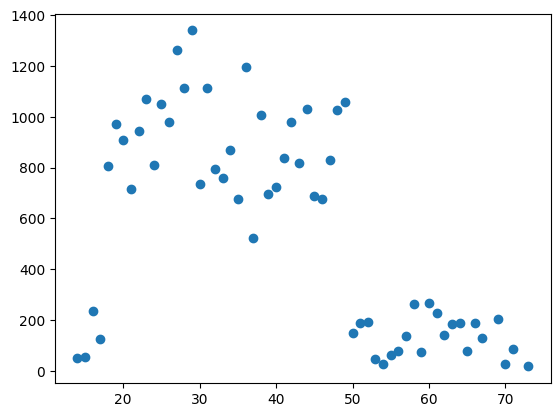

In [62]:
import matplotlib.pyplot as plt

data_counter

plt.scatter(data_counter.keys(), data_counter.values())
# for num, freq in data_counter.items():
#     plt.annotate(f'[{num}: {freq}]', xy=(num, freq))
#     print(num, freq)
# plt.annotate(text="", xy=(data_counter.keys()[0], data_counter.values()[0]))

# plt.plot([min(data_counter.keys()), max(data_counter.keys())], [max(data_counter.values()), min(data_counter.values())], color='green')
plt.show()

In [74]:
mnAge = min(data)
mxAge = max(data)
inLen = math.ceil( (mxAge - mnAge)/7)
print("длина интвервала",inLen)
l = mnAge
r= mnAge + inLen
intervals = [[],[],[],[],[],[],[]]
markedX = []
for i in intervals:
    for j in range(len(data)):
        if l<=data[j]<r:
            i.append(data[j])
    markedX.append((l+r)/2)
    l += inLen
    r += inLen
xSredMarked =0
scoMarked = 0
print("среднее  частота")
for i in range(len(intervals)):
    xSredMarked += markedX[i] * len(intervals[i])
    print(markedX[i],"   ", len(intervals[i]))
xSredMarked/=len(data)
for i in range(len(intervals)):
    scoMarked+=len(intervals[i])*(markedX[i]-xSredMarked)**2
scoMarked /= len(data)
scoMarked = math.sqrt(scoMarked)
print("интервалы",intervals)


def mean_sqred(data):
    return sum([x**2 for x in data]) / len(data)

def average(data):
    average_sum = 0
    for num in data:
        average_sum += num
    average_num = average_sum/len(data)
    return average_num

def variance(data):
    variance_sum = 0
    average_of_data = average(data)
    num_count = Counter(data)
    for num in data:
        
        variance_sum += ((num - average_of_data)**2)
    return ((variance_sum)/len(data))


all_freq = sum(data_counter.values())
print("Сумма частот:",all_freq)
stepsvo = 7 - 1 - 2
grouped_avg_sum = 0
for i in range(len(intervals)):
    grouped_avg_sum += markedX[i]

grouped_avg = grouped_avg_sum / len(intervals)
ata_counter = Counter(data)
print(sorted(data_counter.items()))

interval_variances = []
for interval in intervals:
    if len(interval) > 1:
        interval_variance = variance(interval)
        interval_variances.append(interval_variance)
    else:
        interval_variances.append(0)
print("Дисперсия в каждом интервале:", interval_variances)

print(sum(interval_variances))
# print("Среднее по группированным данным:",grouped_avg)
d_inside_groups = 0 
for i in range(len(intervals)):
    d_inside_groups += len(intervals[i]) * interval_variances[i]

d_inside_groups = d_inside_groups / all_freq

print("Дисперсия внутри групп:",d_inside_groups)

print(all_freq)
print(markedX, intervals)
avg_in_each_group = []

for i in range(len(intervals)):
    avg_in_each_group.append(average(intervals[i]))

print("Среднее в каждой группе:",avg_in_each_group)
x_v=0

for i in range(len(markedX)):
    x_v+=avg_in_each_group[i]*len(intervals[i])

x_v = x_v / all_freq

print("Среднее по группам:",x_v, all_freq)

d_mezh =0

for i in range(len(intervals)):
    print("len(intervals[i])",len(intervals[i]))
    print("avg_in_each_group[i]",avg_in_each_group[i])
    d_mezh+= len(intervals[i])*(avg_in_each_group[i]-x_v)**2

d_mezh = d_mezh / all_freq


print("Дисперсия между группами:",d_mezh)

d_obsh = d_mezh+ d_inside_groups

print("Общая дисперсия:",d_obsh)
d_between_groups = 0


print("Корреляционное отношение", math.sqrt(d_mezh / d_obsh))

длина интвервала 9
среднее  частота
18.5     4811
27.5     9476
36.5     7243
45.5     7951
54.5     1140
63.5     1472
72.5     330
интервалы [[14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,

138